# Digit Recognition

# Step 1: Import libraries and read files

In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

# dataset
train_set = pd.read_csv("E:\\Sushma\\SVM\\Assignment\\train.csv")

In [2]:
# dataset
test_set = pd.read_csv("E:\\Sushma\\SVM\\Assignment\\test.csv")

Data Observation

In [3]:
train_set.shape

(42000, 785)

In [4]:
test_set.shape

(28000, 784)

In [5]:
train_set.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_set.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
order = list(np.sort(train_set['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# Step 2: Test data subset

Let us take only 20% of the data, as per the questionaire, to further build the model and check accuracies.

In [8]:
train_set_percent = train_set.sample(frac=0.2, random_state=1)

In [9]:
train_set_percent.shape

(8400, 785)

In [10]:
order = list(np.sort(train_set_percent['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


All the unique digits are fetched into our sample train set

# Step 3: EDA

In [11]:
digits_mean = train_set_percent.groupby('label').mean()
digits_mean.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


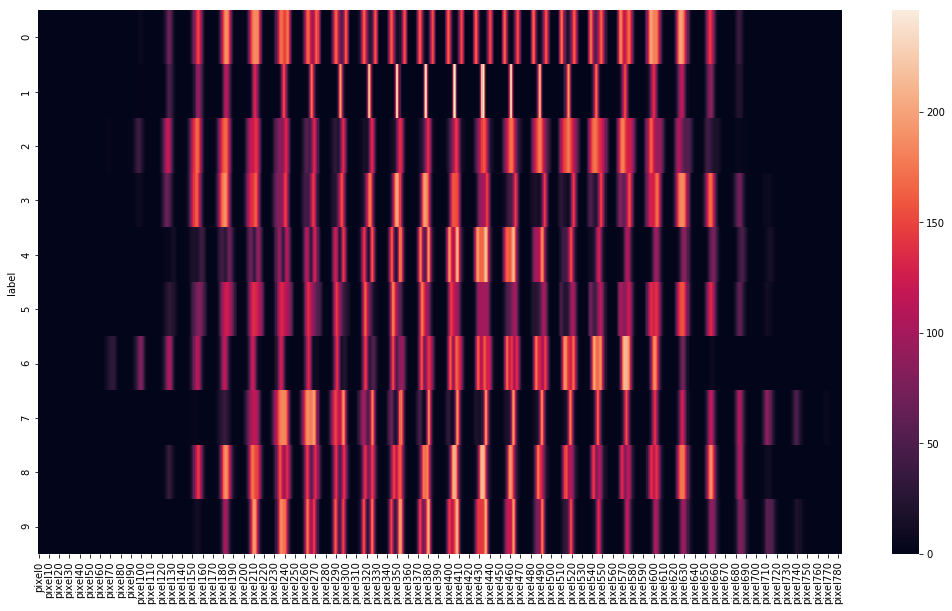

In [12]:
plt.figure(figsize=(18, 10))
sns.heatmap(digits_mean)

Nothing much can be inferred from the above graph

# Step 4: Test and Train Split

In [13]:
# splitting into X and y
X = train_set_percent.drop("label", axis = 1)
y = train_set_percent['label']

In [14]:
# # scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 1)

In [15]:
X_train.shape

(6720, 784)

Some EDA too

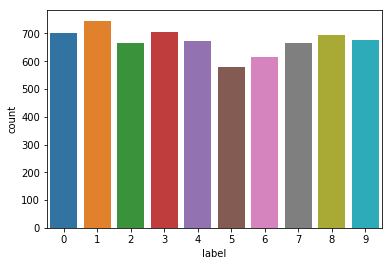

In [16]:
# # basic plots: How do various attributes vary with the digits

sns.countplot(y_train)

# Step 5: Identify the type of kernel required

In [17]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [18]:
# confusion matrix and accuracy for linear model

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9047619047619048 

[[148   0   1   0   1   2   1   0   0   0]
 [  0 192   1   0   0   0   0   0   1   0]
 [  5   1 155   4   1   0   0   0   3   1]
 [  0   1   5 144   0   7   0   3   7   0]
 [  0   0   3   0 135   0   2   1   0  15]
 [  0   2   4   8   2 132   0   0   3   1]
 [  3   0   1   0   5   4 168   1   3   0]
 [  1   1   4   0   5   0   0 166   0   6]
 [  2   7   1   6   1   4   0   0 130   2]
 [  0   0   0   3   1   0   0  11   2 150]]


In [19]:
# non-linear model
# using polynomial kernel

# model
poly_model = SVC(kernel='poly')

# fit
poly_model.fit(X_train, y_train)

# predict
y_pred = poly_model.predict(X_test)

In [20]:
# confusion matrix and accuracy for a polynomial method

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.830952380952381 

[[135   0   2   0   0   1   2   1  12   0]
 [  0 192   0   0   0   0   0   0   2   0]
 [  0   1 123   2   1   0   0   0  43   0]
 [  0   0   3 126   0   1   0   0  35   2]
 [  0   0   1   0 138   0   1   0   6  10]
 [  0   0   3   2   1  95   0   0  49   2]
 [  0   0   1   0   4   2 157   0  21   0]
 [  0   4   1   1   4   0   0 128  16  29]
 [  0   2   0   2   0   0   0   0 149   0]
 [  0   0   0   2   2   0   0   5   5 153]]


In [21]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
rbf_model = SVC(kernel='rbf')

# fit
rbf_model.fit(X_train, y_train)

# predict
y_pred = rbf_model.predict(X_test)

In [22]:
# confusion matrix and accuracy for rbf

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.930952380952381 

[[145   0   2   0   1   1   3   1   0   0]
 [  0 194   0   0   0   0   0   0   0   0]
 [  1   0 159   3   1   0   1   0   4   1]
 [  0   1   6 149   0   4   0   2   5   0]
 [  0   0   4   1 143   0   1   2   0   5]
 [  0   1   3   4   0 142   1   0   1   0]
 [  4   0   6   0   1   3 169   1   1   0]
 [  0   1   4   0   3   0   0 169   1   5]
 [  0   4   1   3   1   2   0   0 139   3]
 [  0   0   0   4   0   1   0   4   3 155]]


It is clear that RBF gives us the best accuracy compared to any other method. So lets go ahead and build our model and tune our parameters with RBF.

# Step 5: Grid Search - Hyperparameter Tuning

In [23]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)      

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 15.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [24]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,128.267014,6.264579,16.285893,0.862269,1,0.01,"{'C': 1, 'gamma': 0.01}",0.723958,0.742560,0.729167,...,0.740923,0.012830,12,1.000000,1.000000,1.000000,1.000000,0.999814,0.999963,0.000074
1,35.514440,2.590227,10.158744,0.401842,1,0.001,"{'C': 1, 'gamma': 0.001}",0.921131,0.928571,0.927827,...,0.930357,0.007052,4,0.976562,0.972842,0.973958,0.974888,0.971354,0.973921,0.001770
2,53.768716,3.856449,13.131433,0.983485,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.889137,0.904762,0.895833,...,0.899851,0.006531,8,0.918341,0.915551,0.918899,0.916667,0.916295,0.917150,0.001265
3,137.975209,5.451535,15.737789,0.483142,10,0.01,"{'C': 10, 'gamma': 0.01}",0.740327,0.762649,0.749256,...,0.758929,0.012397,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,28.252891,0.677492,8.821593,0.652916,10,0.001,"{'C': 10, 'gamma': 0.001}",0.930804,0.938988,0.936012,...,0.937798,0.004379,1,0.999442,0.999070,0.999256,0.999442,0.999442,0.999330,0.000149
5,23.946951,2.804694,8.290163,0.962853,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.916667,0.936756,0.921875,...,0.927381,0.007698,5,0.963170,0.961124,0.961868,0.962798,0.960565,0.961905,0.000980
6,141.744768,4.760273,16.423830,0.766225,100,0.01,"{'C': 100, 'gamma': 0.01}",0.740327,0.762649,0.749256,...,0.758929,0.012397,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,29.773450,0.715386,9.019932,0.223634,100,0.001,"{'C': 100, 'gamma': 0.001}",0.931548,0.938988,0.936012,...,0.937798,0.003782,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,18.878685,1.325282,6.989794,0.427244,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.915923,0.935268,0.921131,...,0.926190,0.006970,6,0.994978,0.995536,0.995350,0.995164,0.996280,0.995461,0.000450
9,142.135743,6.556890,16.288136,1.051510,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.740327,0.762649,0.749256,...,0.758929,0.012397,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


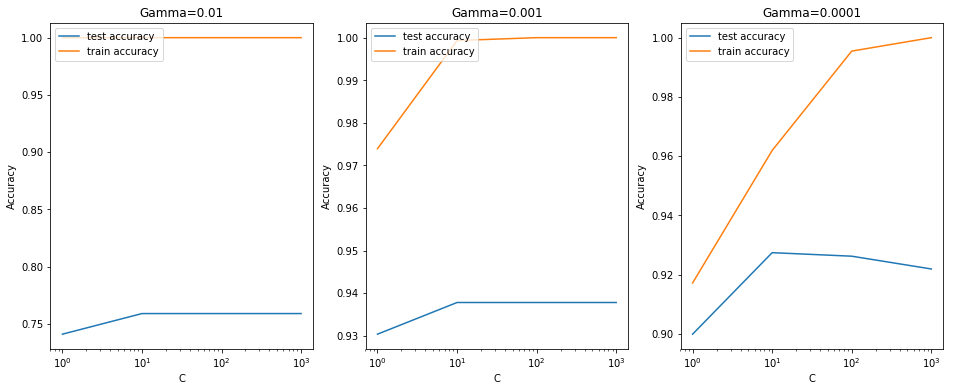

In [25]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
# plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
# plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
# plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [26]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.937797619047619 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


We have our best C and Gamma values as 10 and 0.001 respectively that can be used to build a model and predict on our test set

# Step 6: Building and evaluating a model

In [27]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")


accuracy 0.9363095238095238 

[[148   0   0   0   0   2   2   1   0   0]
 [  0 194   0   0   0   0   0   0   0   0]
 [  2   0 161   2   1   0   0   0   3   1]
 [  0   1   7 149   0   4   0   2   4   0]
 [  0   0   4   0 140   0   2   3   0   7]
 [  0   0   3   3   0 144   0   0   1   1]
 [  3   0   3   0   1   3 172   1   2   0]
 [  1   1   5   0   4   0   0 170   1   1]
 [  0   4   0   3   1   2   0   0 141   2]
 [  0   0   0   4   0   0   0   7   2 154]] 



Lets predict on our actual test data too with the same C and Gamma values

# Step 7: Predict using the same model on the test data set that was provided

In [28]:
scaled_test = scale(test_set)
y_pred_test_set = model.predict(scaled_test)

In [29]:
y_pred_df = pd.DataFrame(y_pred_test_set)

In [30]:
y_pred_df["label"] = y_pred_df

In [31]:
Test_Predict_Final = pd.merge(test_set, y_pred_df,left_index=True, right_index=True)

In [32]:
order = list(np.sort(Test_Predict_Final['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [33]:
Test_Predict_Final.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,0,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3


In [34]:
Test_Predict_Final['ImageId'] = Test_Predict_Final.index

In [35]:
Submission = Test_Predict_Final[['ImageId','label']]
Submission.set_index('ImageId',inplace=True)

In [36]:
# DF TO csv
Submission.to_csv('E:\Sushma\SVM\Assignment\Submission.csv', sep=',')

# Step 8: Visualise the predicted data against the pixel info provided in the test data set

Some images of what the digit should have been and what is the predicted output

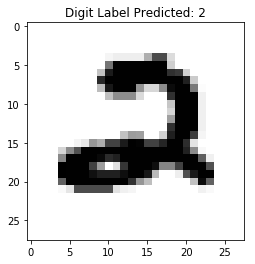

In [37]:
# First row is first image
first_image = test_set.loc[0,:]
first_label = Test_Predict_Final['label'].iloc[0]

# 784 columns correspond to 28x28 image
plottable_image = np.reshape(first_image.values, (28, 28))

# Plot the image
plt.imshow(plottable_image, cmap='gray_r')
plt.title('Digit Label Predicted: {}'.format(first_label))
plt.show()

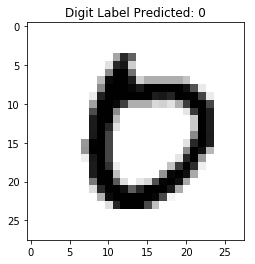

In [38]:
# First row is first image
first_image = test_set.loc[1000,:]
first_label = Test_Predict_Final['label'].iloc[1000]

# 784 columns correspond to 28x28 image
plottable_image = np.reshape(first_image.values, (28, 28))

# Plot the image
plt.imshow(plottable_image, cmap='gray_r')
plt.title('Digit Label Predicted: {}'.format(first_label))
plt.show()

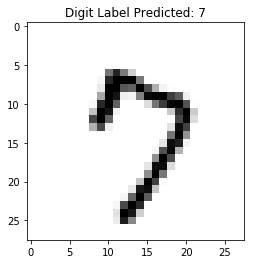

In [39]:
# First row is first image
first_image = test_set.loc[20000,:]
first_label = Test_Predict_Final['label'].iloc[20000]

# 784 columns correspond to 28x28 image
plottable_image = np.reshape(first_image.values, (28, 28))

# Plot the image
plt.imshow(plottable_image, cmap='gray_r')
plt.title('Digit Label Predicted: {}'.format(first_label))
plt.show()

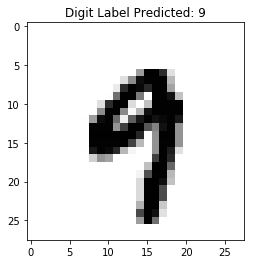

In [40]:
# First row is first image
first_image = test_set.loc[27998,:]
first_label = Test_Predict_Final['label'].iloc[27998]

# 784 columns correspond to 28x28 image
plottable_image = np.reshape(first_image.values, (28, 28))

# Plot the image
plt.imshow(plottable_image, cmap='gray_r')
plt.title('Digit Label Predicted: {}'.format(first_label))
plt.show()